# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn import metrics
from numpy import mean
from scipy.stats import uniform
from scipy import interp
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [7]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\bran\\brain_stroke.csv')
dataset.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Exploratory data analysis

In [8]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [10]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
dataset.shape

(4981, 11)

In [16]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

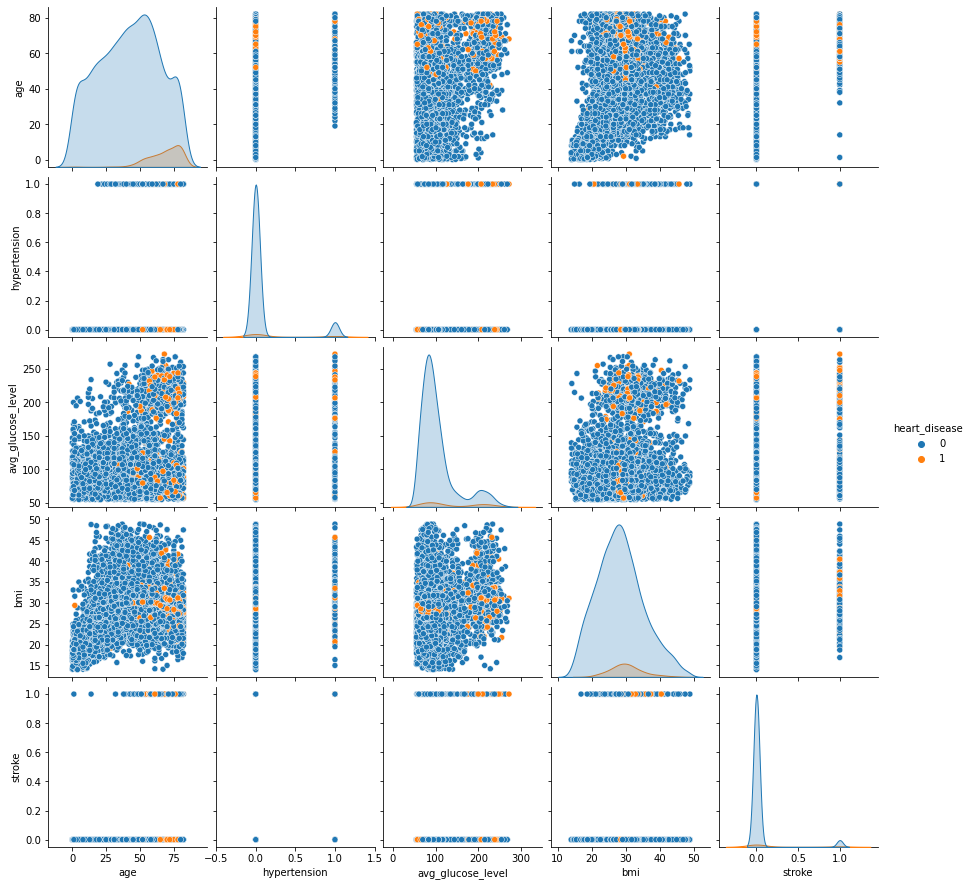

In [17]:
sns.pairplot(data = dataset, hue = 'heart_disease')

<AxesSubplot:>

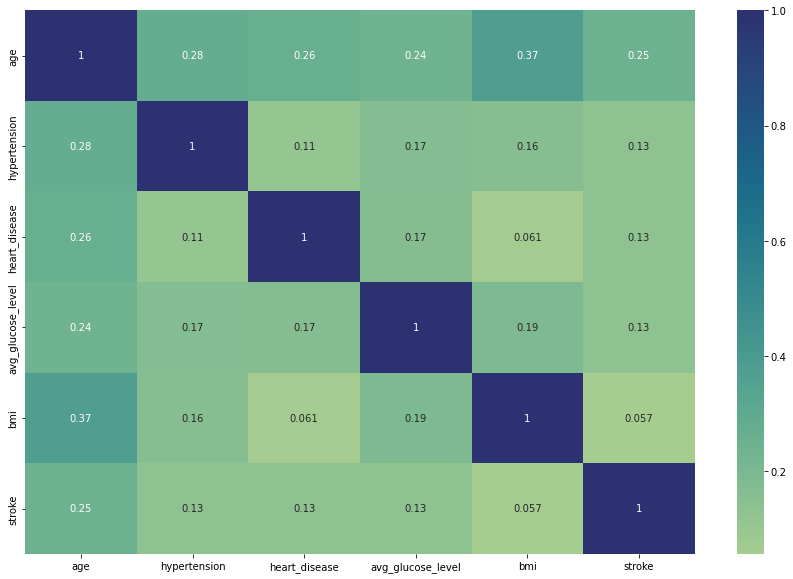

In [18]:
#Check for correlation
plt.figure(figsize = (15, 10))
sns.heatmap(dataset.corr(), annot = True, cmap = 'crest')

In [19]:
# Encode features into numerics

dataset['gender'] = dataset['gender'].map({'Female':1,'Male':0})
dataset['ever_married'] = dataset['ever_married'].map({'Yes': 1, 'No': 0})
dataset['work_type'] = dataset['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job':2, 'children':3})
dataset['Residence_type'] = dataset['Residence_type'].map({'Urban': 1, 'Rural':0})
dataset['smoking_status'] = dataset['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})

In [20]:
X = dataset.iloc[:,:-1]
y = dataset['stroke'] 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
X_scaled=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)
X_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,0.963379,0.0,0.0,1.0,0.000000,1.0,0.071623,0.257880,0.000000
1,0.0,0.755859,1.0,0.0,1.0,0.000000,0.0,0.107223,0.363897,0.333333
2,0.0,0.243164,0.0,0.0,0.0,0.000000,0.0,0.156838,0.404011,0.666667
3,1.0,0.267578,0.0,0.0,0.0,0.666667,1.0,0.320307,0.209169,1.000000
4,0.0,0.536133,1.0,0.0,1.0,0.333333,0.0,0.133888,0.289398,0.333333
...,...,...,...,...,...,...,...,...,...,...
3979,0.0,0.792480,0.0,0.0,1.0,0.333333,0.0,0.185854,0.418338,0.333333
3980,0.0,0.108887,0.0,0.0,0.0,1.000000,1.0,0.200903,0.266476,1.000000
3981,1.0,0.426270,0.0,0.0,0.0,0.000000,1.0,0.199680,0.295129,1.000000
3982,1.0,0.060059,0.0,0.0,0.0,1.000000,0.0,0.173439,0.111748,1.000000


In [28]:
model_1 = LogisticRegression(class_weight = 'balanced')
model_1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [30]:
# Predictions
predictions_1 = model_1.predict(X_test)

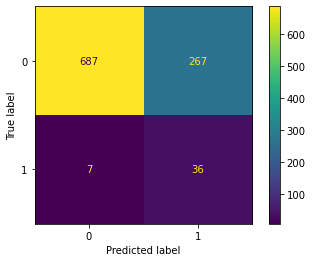

In [31]:
cm = confusion_matrix(y_test, predictions_1, labels = model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_1.classes_)
disp.plot()

In [32]:
clf_report = classification_report(y_test, predictions_1)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.72      0.83       954
           1       0.12      0.84      0.21        43

    accuracy                           0.73       997
   macro avg       0.55      0.78      0.52       997
weighted avg       0.95      0.73      0.81       997



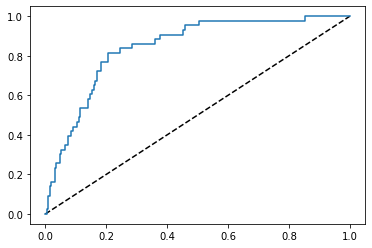

In [33]:
# ROC Curve

y_pred_prob = model_1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [34]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
# Predictions
predictions_2 = model_2.predict(X_test)

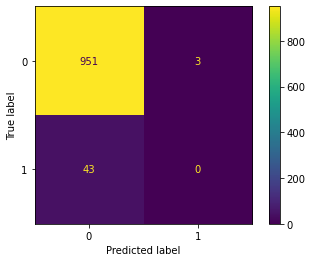

In [36]:
cm = confusion_matrix(y_test, predictions_2, labels = model_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_2.classes_)
disp.plot()

In [37]:
clf_report = classification_report(y_test, predictions_2)
print(clf_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       954
           1       0.00      0.00      0.00        43

    accuracy                           0.95       997
   macro avg       0.48      0.50      0.49       997
weighted avg       0.92      0.95      0.93       997



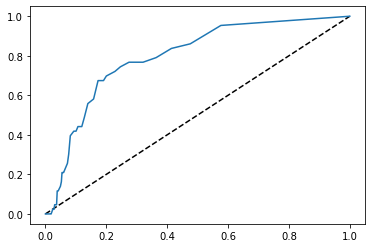

In [39]:
# ROC Curve

y_pred_prob = model_2.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

Conclusion.The randomforestclassifier has better fit 
